<a href="https://colab.research.google.com/github/LDY681/CITS4401/blob/master/CITS4012_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 02

Today we will investigate some word representation models.



## Word2Vec

In [ ]:
import pprint
import re

# For parsing our XML data
from lxml import etree

# For data processing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# For implementing the word2vec family of algorithms
from gensim.models import Word2Vec

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Download data from Google Drive
For today's lab we will download and use the TED script data from Google Drive.

#### Google Drive Access Setup
Running the following code will generate a link and a field for entering a verification code.

Click the link, which will direct to the Google Sign In page. Sign in with your own Google account by following the instructions on the page.

Then copy the generated verification code from the page into the verification code field and press Enter

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#### Downloading TED Scripts from Google Drive
Click on left side "Files" tab and see the file is downloaded successfully.

In [ ]:
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('ted_en-20160408.xml')

### Data Preprocessing

In [ ]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)

# Tokenising the sentence to process it by using NLTK library
sent_text=[]
for parse_text in target_text.xpath('//content/text()'):
  # Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
  content_text = re.sub(r'\([^)]*\)', '', parse_text)
  sent_text.extend(sent_tokenize(content_text))

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


### Word2Vec - Continuous Bag-Of-Words (CBOW)

For more details about gensim.models.word2vec you can refer to [API for Gensim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
# Initialize and train a word2vec model with the following parameters:
# sentence: iterable of iterables, i.e. the list of lists of tokens from our data
# vector_size: dimensionality of the word vectors
# window: window size
# min_count: ignores all words with total frequency lower than the specified count value
# workers: Use specified number of worker threads to train the model (=faster training with multicore machines)
# sg: training algorithm, 0 for CBOW, 1 for skip-gram
wv_cbow_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=2, sg=0)

In [ ]:
# The trained word vectors are stored in a KeyedVectors instance as model.wv
# Get the top 10 similar words to 'man' by calling most_similar()
# most_similar() computes cosine similarity between a simple mean of the vectors of the given words and the vectors for each word in the model

similar_words= wv_cbow_model.wv.most_similar("man") # topn=10 by default
pprint.pprint(similar_words)

[('woman', 0.8587272763252258),
 ('guy', 0.8291348814964294),
 ('boy', 0.7908284664154053),
 ('lady', 0.7581247687339783),
 ('girl', 0.7467600107192993),
 ('gentleman', 0.7287656664848328),
 ('poet', 0.6999704241752625),
 ('kid', 0.6936692595481873),
 ('rabbi', 0.6747317910194397),
 ('soldier', 0.6702558398246765)]


In [ ]:
# Get the actual values of the word embedding
print(wv_cbow_model.wv['man'].shape)
wv_cbow_model.wv['man']

(100,)


array([ 0.60685945, -1.4720893 , -0.5555122 ,  0.41853294,  3.0359192 ,
        0.66410536, -0.19398196, -0.25500894, -0.21476606, -0.9031569 ,
       -1.271061  , -1.3551382 , -0.69903153,  0.76567477, -0.22641864,
       -0.23364457,  0.08249884,  0.34372026,  1.0979712 , -0.47126678,
        0.14631775,  0.76350653, -0.36029148, -0.6420899 ,  1.105928  ,
       -0.5739546 , -1.4254571 , -0.23970161, -0.11716913, -1.4127717 ,
       -0.6327663 , -0.19428213,  1.120359  ,  0.29552048, -0.4403368 ,
       -0.7781586 , -1.7749039 , -0.95066226, -1.7194873 ,  0.58914924,
        1.24877   , -2.237428  , -0.9308997 ,  1.1748303 ,  0.3051784 ,
       -0.57309157, -0.5592564 , -1.5808377 , -0.48706755, -0.63506067,
       -0.35635212, -1.8064479 , -0.01820517,  0.42595696, -0.15961033,
       -0.31712747, -0.0802803 , -0.41574925, -1.3154297 , -0.3400672 ,
       -0.91761494, -0.8314774 ,  0.8798532 ,  1.1056008 , -1.8123772 ,
        0.50630265, -1.0136482 , -0.6793732 , -0.54858965,  1.87

### Word2Vec - Skip Gram

In [ ]:
# Now we switch to a Skip Gram model by setting parameter sg=1
wv_sg_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=2, sg=1)

In [ ]:
similar_words = wv_sg_model.wv.most_similar("man")
pprint.pprint(similar_words)

[('guy', 0.7486716508865356),
 ('woman', 0.7414814829826355),
 ('boy', 0.6883013248443604),
 ('rabbi', 0.6865651607513428),
 ('soldier', 0.6806363463401794),
 ('imam', 0.6686133742332458),
 ('girl', 0.6666482090950012),
 ('waitress', 0.6642106771469116),
 ('gentleman', 0.6600041389465332),
 ('son', 0.6584417223930359)]


In [ ]:
# Get the actual values of the word embedding
print(wv_sg_model.wv['man'].shape)
wv_sg_model.wv['man']

(100,)


array([ 0.01929773, -0.11699665,  0.02510257, -0.3900924 ,  0.05746577,
       -0.32545704,  0.22499293,  0.01624372, -0.37282705, -0.11967955,
        0.06645289, -0.31855267,  0.11150549,  0.12174855,  0.13609643,
       -0.01315264, -0.09146716, -0.27764595,  0.09273223, -0.6474919 ,
        0.36845762,  0.05285766,  0.3048615 , -0.02727229,  0.07570012,
       -0.32143363, -0.1943806 , -0.5393496 , -0.35529333, -0.23425893,
        0.02169297,  0.10467848,  0.3058368 , -0.23348494,  0.11132445,
        0.00895701, -0.46932402, -0.15702084, -0.19303252, -0.03460472,
        0.24047117, -0.5997824 , -0.20956261, -0.06851273,  0.05618289,
        0.0591498 , -0.28936312, -0.1588873 ,  0.11550762,  0.4702715 ,
        0.06012606, -0.5756171 ,  0.0591196 ,  0.29488853, -0.4819099 ,
       -0.46851996, -0.3065339 , -0.233695  , -0.77354515, -0.30411208,
        0.08958799,  0.07706858, -0.00522187,  0.04294226, -0.2981597 ,
        0.20716266, -0.20438708, -0.032197  , -0.29116872, -0.14

## Word2Vec vs FastText

Word2Vec - Skip Gram cannot find similar words to "electrofishing" as "electrofishing" is not in the vocabulary.

In [ ]:
similar_words=wv_sg_model.wv.most_similar("electrofishing")
pprint.pprint(similar_words)

KeyError: "Key 'electrofishing' not present in vocabulary"

### FastText - Skip Gram

In [ ]:
from gensim.models import FastText

In [ ]:
# Now we initialize and train FastText with Skip Gram architecture (sg=1)
ft_sg_model = FastText(sentences, vector_size=100, window=5, min_count=5, workers=2, sg=1)

In [ ]:
# As we can see, FastText allows us to obtain word vectors for out-of-vocabulary words
result = ft_sg_model.wv.most_similar("electrofishing")
pprint.pprint(result)

[('electrolux', 0.8434932231903076),
 ('electrolyte', 0.8434127569198608),
 ('electroshock', 0.8383511304855347),
 ('electro', 0.8373796939849854),
 ('electroencephalogram', 0.8315842747688293),
 ('electrochemical', 0.8223231434822083),
 ('airbag', 0.8195294141769409),
 ('electrogram', 0.8184046745300293),
 ('electric', 0.8128581047058105),
 ('electromagnet', 0.8105154633522034)]


In [ ]:
# Get the actual values of the word embedding
print(ft_sg_model.wv['man'].shape)
ft_sg_model.wv['man']

(100,)


array([-1.50047988e-01, -6.89602867e-02,  3.89394671e-01, -2.76936352e-01,
        1.41633540e-01,  1.94506139e-01,  4.92269248e-01,  1.09998822e-01,
        5.78278974e-02,  2.52662748e-01, -6.29469275e-01, -3.53289656e-02,
       -3.07683527e-01,  7.87398756e-01,  7.92795643e-02, -2.35458776e-01,
        2.41862983e-01,  3.04099023e-01,  1.55633479e-01, -3.55820388e-01,
       -4.97786731e-01, -6.50473952e-01, -2.35346720e-01,  3.07153434e-01,
       -6.15150221e-02,  1.22725822e-01, -4.85381395e-01, -4.19013090e-02,
        2.19789639e-01, -7.03777745e-02, -3.39940041e-01,  2.47025982e-01,
       -1.49779603e-01,  1.57967713e-02,  2.55649269e-01,  1.57415852e-01,
       -4.74274158e-04, -4.44329351e-01, -2.56455123e-01, -1.17389075e-01,
        3.32507670e-01, -4.05092984e-01, -1.35794401e-01, -1.08681582e-01,
        1.38201877e-01,  2.28947133e-01, -1.22739911e-01, -5.97184300e-01,
       -2.39729024e-02, -1.55293480e-01, -1.55925348e-01, -5.38983583e-01,
        2.76638065e-02, -

### FastText - Continuous Bag-Of-Words (CBOW)

In [ ]:
# Now we initialize and train FastText with CBOW architecture (sg=0)
ft_cbow_model = FastText(sentences, vector_size=100, window=5, min_count=5, workers=2, sg=0)

In [ ]:
# Again, FastText allows us to obtain word vectors for out-of-vocabulary words
result = ft_cbow_model.wv.most_similar("electrofishing")
pprint.pprint(result)

[('licensing', 0.9190741777420044),
 ('fishing', 0.9163623452186584),
 ('recycling', 0.9082537293434143),
 ('transplanting', 0.9065425395965576),
 ('planting', 0.9061746001243591),
 ('flourishing', 0.9019662141799927),
 ('operating', 0.9014682173728943),
 ('skateboarding', 0.9014284610748291),
 ('filtering', 0.8999918699264526),
 ('refreshing', 0.8990527391433716)]


In [ ]:
# Get the actual values of the word embedding
print(ft_cbow_model.wv['man'].shape)
ft_cbow_model.wv['man']

(100,)


array([ 2.5425415 , -1.1754454 ,  1.6317027 , -1.8820904 ,  2.6224658 ,
       -3.3683383 ,  3.1499622 ,  0.68869096,  0.5023509 ,  1.0023242 ,
        0.27640718, -0.219519  , -1.0553201 ,  1.7997074 , -0.31267235,
        1.11762   ,  2.951331  ,  1.2837464 ,  1.6842574 , -1.6547748 ,
        0.47951406, -3.3914952 ,  0.29087505, -2.577944  , -1.6098778 ,
        0.75627357, -0.5521012 ,  0.7146278 , -0.9032083 , -0.33916712,
        0.17855282, -1.6272317 ,  3.1951585 ,  2.4263668 ,  1.2513207 ,
       -1.3610299 ,  1.9772518 , -3.597067  ,  0.45941162,  2.9057949 ,
       -2.4691849 , -3.427454  , -2.444344  ,  0.8545365 ,  0.76271373,
       -1.9802312 , -0.3197431 , -1.7366194 , -2.6800025 ,  0.81547636,
        0.3761957 , -5.175985  , -1.3547659 ,  1.5462291 ,  1.2253296 ,
        1.4600092 , -0.13631634, -0.29946953, -0.55912817,  0.93046254,
        1.3275    , -1.955591  ,  2.9287431 ,  2.2828186 ,  1.3954879 ,
        0.3383766 , -0.01674332, -3.0262206 ,  0.47083744,  2.09

## King - Man + Woman = ?

Try both CBOW and Skip Gram model to calculate "King - Man + Woman = ?"

In [ ]:
# We can specify the positive/negative word list with the positive/negative parameters to create a word expression
# Top N most similar words can be specified with the topn parameter
result = wv_cbow_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('president', 0.7947894334793091)]


In [ ]:
result = wv_sg_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


[('queen', 0.6636009812355042)]


In [ ]:
result = ft_cbow_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


[('kidding', 0.8935132026672363)]


In [ ]:
result = ft_sg_model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


[('pauling', 0.7013661861419678)]


This is not what we expected...Probably not enough data to answer as "queen"

Let's try with a larger sized training data (Google has already trained Word2Vec with Google News data) in the following section


## Using Pretrained word embeddings with Gensim



### 1.Download and load from Google pretrained Word2Vec binary file
[Link to Project](https://code.google.com/archive/p/word2vec/)

In [ ]:
# Download the pre-trained vectors trained on part of Google News dataset (about 100 billion words)
# Beware, this file is big (3.39GB) - might be long waiting!
id2 = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('GoogleNews-vectors-negative300.bin.gz')

In [ ]:
# Uncompress the downloaded file
!gzip -d /content/GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the pretrained vectors with KeyedVectors instance
# Note that we set the limit=100000 here, which means we set a maximum number of word-vectors to read from the file, to avoid out of memory issue and load vectors faster.

filename = 'GoogleNews-vectors-negative300.bin'
gn_wv_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=100000)

In [ ]:
# Now we can try to calculate "King - Man + Woman = ?" again
result = gn_wv_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


In [ ]:
# Let's also try to extract the word embeddings and check their shape
wv_banana = gn_wv_model["banana"]
wv_avocado = gn_wv_model["avocado"]
print(wv_banana.shape)
print(wv_avocado.shape)

# We can also calculate the cosine similarity ourselves with the extracted words
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([wv_banana],[wv_avocado])

(300,)
(300,)


array([[0.5332662]], dtype=float32)

In [ ]:
# Get the actual value of the word embedding
print(gn_wv_model['man'].shape)
gn_wv_model['man']

(300,)


array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

### 2.Load a pretrained word embedding model using API
The following code illustrates another way of loading pretrained word embeddings with Gensim. Here we try with GloVe embedding trained on Twitter data

In [ ]:
import gensim.downloader as api

# download the model and return as object ready for use
model = api.load("glove-twitter-25")
# The similarity() function can calculate the cosine similarity between two given words
print(model.similarity("cat","dog"))
# The distance() function is another way of calculating the similarity between two given words, which returns (1 - cosine similarity) instead
print(model.distance("cat","dog"))

[==================================================] 100.0% 104.8/104.8MB downloaded
0.95908207
0.040917932987213135


In [ ]:
# Get the actual value of the word embedding
print(model['man'].shape)
model['man']

(25,)


array([ 0.37013 , -0.39648 , -0.021712, -0.6301  , -0.3189  ,  0.34329 ,
        0.10968 ,  0.4879  , -0.48663 ,  0.36837 , -0.39179 ,  0.25414 ,
       -4.9282  ,  0.067597,  0.37147 ,  0.36817 ,  1.1655  ,  0.092116,
       -0.87735 , -0.74562 ,  0.40903 ,  1.5672  , -0.23879 ,  0.24755 ,
        0.76386 ], dtype=float32)

# [Tips] Play with Colab Form Fields
**The Form** supports multiple types of fields, including **input fields**, **dropdown menus**.

In Lab1 E1, we already used the input fields. Let's try more now. You can edit this section by double-clicking it.

Let's get familiar by changing the value in each input field (on the right) and checking the changes in the code (on the left) - and vice versa

In [ ]:
#@title Example form fields
#@markdown please put description

string = 'examples'  #@param {type: "string"}
slider_value = 164  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2023-02-17'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}


#print the output
print("string is",string)
print('slider_value',slider_value)

string is examples
slider_value 164


# Lab 2 Exercise
Please complete the following **question E1** for Lab 2 and check with your Lab Facilitator in the lab.

**Submission Due**: Your Lab 3 (in Week 4)

**Submission Method**: Show your final code to your Lab Facilitator during the Lab.

## E1. Let's find synonyms
Let's assume the cosine similarity, or distance, between two word embedding vectors can indicate if the words are semantically similar to each other. In this exercise, you will implement a function called find_synonym(), in which:

1. A list of 6 words are given
2. You need to implement your own algorithm to find the **synonym for each of the words (i.e. words with the highest cosine similarity or smallest distance)** in the list **from the rest of 5 words** based on the cosine similarity calculated. (Using the .similarity() or distance() function from *Load pretrained word embedding model using API* section above may help)
3. Print out the synonyms found

Please use the pretrained 50-dimensional GloVe word embedding trained on wikipedia and gigaword corpus. (You can use the gensim.downloader to load by passing 'glove-wiki-gigaword-50' to the .load() function, refer to the *Load pretrained word embedding model using API* section above)

Before the function, you may need to import any required libraries.






In [ ]:
# E1. Let's find synonyms
# Let's assume the cosine similarity, or distance, between two word embedding vectors can indicate if the words are semantically similar to each other. In this exercise, you will implement a function called find_synonym(), in which:

# A list of 6 words are given
# You need to implement your own algorithm to find the synonym for each of the words (i.e. words with the highest cosine similarity or smallest distance) in the list from the rest of 5 words based on the cosine similarity calculated. (Using the .similarity() or distance() function from Load pretrained word embedding model using API section above may help)
# Print out the synonyms found
# Please use the pretrained 50-dimensional GloVe word embedding trained on wikipedia and gigaword corpus. (You can use the gensim.downloader to load by passing 'glove-wiki-gigaword-50' to the .load() function, refer to the Load pretrained word embedding model using API section above)

# Before the function, you may need to import any required libraries.
import gensim.downloader as api

# Complete the following function based on the requirements above

# The list of words to find synonyms
words = ["dog", "cat", "person", "computer", "people", "laptop"]

# The dictionary that stores the highest similarity value to each keywords
# @ param key: word
# @ param value: [synonym1, cosine similarity]
dict = {
  "dog": [],
  "cat": [],
  "person": [],
  "computer": [],
  "people": [],
  "laptop": []
}

# Load GloVe
model = api.load("glove-wiki-gigaword-50")

def find_synonyms():
  for word in words:
    find_synonym(word)

def find_synonym(word):
  for candidate in [x for x in words if x != word]:
    similarity = model.similarity(word, candidate)
    # if the dict entry is empty, push
    if dict[word] == []:
      dict[word] = [candidate, similarity]
    # elif compare the entry with current similarity, and update
    else:
      if similarity > dict[word][1]:
        dict[word] = [candidate, similarity]

def print_synonyms():
  synonyms = [(dictKey, dict[dictKey][0]) for dictKey in dict]
  print(synonyms)

# Call the function to get the synonyms and print out the synonyms for each word
find_synonyms()
print_synonyms()


[('dog', 'cat'), ('cat', 'dog'), ('person', 'people'), ('computer', 'laptop'), ('people', 'person'), ('laptop', 'computer')]


### **E1 Sample Output**
The following is the sample output for E1 - Please just only check the output format, i.e. your output DO NOT need to be exactly the same, as long as you fullfill all the E1 requirements given above.

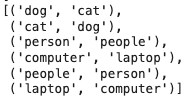

# Extension

## Word Embedding Visual Inspector (WEVI)
If you would like to visualise how Word2Vec is learning, the following link is useful https://ronxin.github.io/wevi/